In [53]:
# Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")

# Section 6 : Regression by Grid Search

Consider the function , $$f(\textbf{x},\Theta) = \theta_1 x_1^2 + \theta_2 x_2$$
to be fitted to the "dataset3.npz". Assume that an initial solution to this function is already obtained by Gradient descent, it is found to $\Theta_0 = (1, 4)^T$. Perform grid search in a suitable neighbourhood of this point and precisely estimate $\Theta$.

In [2]:
x1 = np.load('.\dataset4.npz')['x1']
x2 = np.load('.\dataset4.npz')['x2']
y = np.load('.\dataset4.npz')['y']

#Construct a uniform grid
g0 = np.linspace(0,2,1000)  #1000 point in the neighborhood of theta1 
g1= np.linspace(3,5,1000)   #1000 point in the neighborhood of theta2
#Perform search
def compute_cost(x1,x2,y,theta):
    fx = theta[0]*x1**2+theta[1]*x2
    m = len(x1)
    J = np.sum((fx-y)**2)/(2*m)
    return J

theta0 = np.array([[1],[4]])
Jmin = compute_cost(x1,x2,y,theta0)

for i in g0:
    for j in g1:
        Jnew = compute_cost(x1,x2,y,np.array([[i],[j]]))
        if Jnew<Jmin:
            Jmin = Jnew
            theta = np.array([[i],[j]])
print(theta)

[[1.56956957]
 [3.78278278]]


After performing grid search in the neighborhood of $(1,4)^T$, we get the following new optimum value of parameters:
$$\Theta_{opt} = (1.5696,3.7828)^T$$

# Section 7 : Linear Regression with Sklearn

Four Main Assumptions:
1. Linear relationship between features and target,
2. Homoscedasticity: The variance of residual is the same for any value of X,
3. Independence: Observations are independent of each other,
3. No multi-collinearity among features i.e features are indepent

**General Note : Attributes and parameters should be chosen according to the question asked** 

In [96]:
# For performing regression operations
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function

### 7.1. Importing Dataset and Visualisation

1) Import the data X and y from the **"dataset2.npz"** 

2) Print the the top 10 rows of X and y. and Scattter plot of X and y

Top 10 rows of X:
[[10.]
 [-4.]
 [ 4.]
 [ 8.]
 [-8.]
 [ 6.]
 [ 0.]
 [-6.]
 [-2.]
 [ 2.]]

Top 10 rows of y:
[[137.30104493]
 [ 30.27196401]
 [ 41.39087638]
 [100.52268636]
 [ 73.17271168]
 [ 70.65513882]
 [ 12.58840376]
 [ 40.1882022 ]
 [  7.03865692]
 [ 31.62571764]]


Text(0.5, 1.0, 'Scatter Plot of X and y')

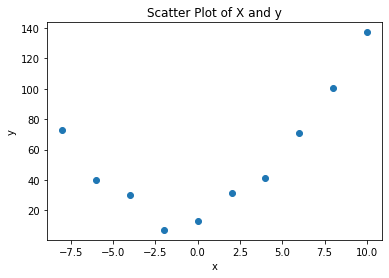

In [97]:
#Importing data X and y from "dataset2.npz"
X = np.load('.\dataset2.npz')["x"].reshape(-1,1)
y = np.load('.\dataset2.npz')["y"].reshape(-1,1)

#printing top 10 rows of X
print("Top 10 rows of X:")
print(X[:10],end = "\n\n")

#printing top 10 rows of y
print("Top 10 rows of y:")
print(y[:10])

#Scatter plot
plt.plot(X,y,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of X and y")

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### 7.2. Degree 1 (Linear)

3) Using linear regression, find a relation between $Y$ and $X$. Plot the regrssion function(vs $X$) and report the mean square error.

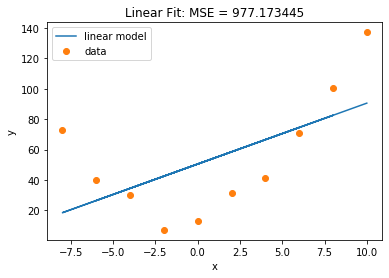

In [98]:
linReg = LinearRegression()
m = len(X)
model = linReg.fit(X,y)
plt.plot(X,model.predict(X),"-")
mse = (np.sum((model.predict(X)-y)**2))/m
plt.plot(X,y,"o")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Linear Fit: MSE = %f"%float(mse))
plt.legend(["linear model","data"])

### 7.3. Degree 2 (Quadratic)

3) Using polynomial regression of degree 2, Find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

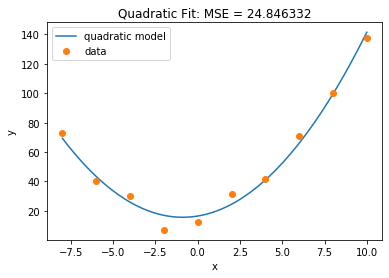

In [99]:
linReg = LinearRegression()
m = len(X)
X_app = np.append(X,X**2,axis=1)
model = linReg.fit(X_app,y)
x_plot = np.linspace(min(X),max(X),100)
plt.plot(x_plot,model.predict(np.append(x_plot,x_plot**2,axis=1)))
mse = (np.sum((model.predict(X_app)-y)**2))/m
plt.plot(X,y,"o")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Quadratic Fit: MSE = %f"%float(mse))
plt.legend(["quadratic model","data"])

### 7.4. Degree 3 (Cubic)

4) Using polynomial regression of degree 3, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error

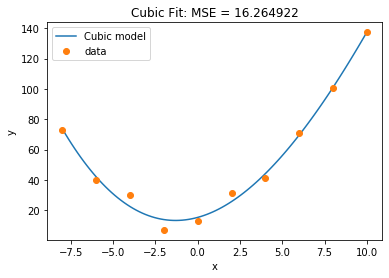

In [100]:
linReg = LinearRegression()
m = len(X)

x_plot = np.linspace(min(X),max(X),100)
X_app = X.copy()
for i in range(2,4):
    X_app = np.append(X_app,X_app[:,0].reshape(-1,1)**i,axis=1)
    x_plot = np.append(x_plot,x_plot[:,0].reshape(-1,1)**i,axis=1)

model = linReg.fit(X_app,y)


plt.plot(x_plot[:,0],model.predict(x_plot))
mse = (np.sum((model.predict(X_app)-y)**2))/m
plt.plot(X,y,"o")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Cubic Fit: MSE = %f"%float(mse))
plt.legend(["Cubic model","data"])

### 7.5. Degree 9

5) Using polynomial regression of degree 9, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

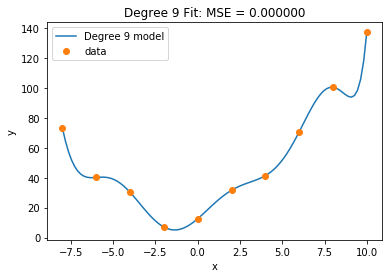

In [101]:
linReg = LinearRegression()
m = len(X)

x_plot = np.linspace(min(X),max(X),100)
X_app = X.copy()
for i in range(2,10):
    X_app = np.append(X_app,X_app[:,0].reshape(-1,1)**i,axis=1)
    x_plot = np.append(x_plot,x_plot[:,0].reshape(-1,1)**i,axis=1)

model = linReg.fit(X_app,y)


plt.plot(x_plot[:,0],model.predict(x_plot))
mse = (np.sum((model.predict(X_app)-y)**2))/m
plt.plot(X,y,"o")
plt.ylabel("y")
plt.xlabel("x")
plt.title("Degree 9 Fit: MSE = %f"%float(mse))
plt.legend(["Degree 9 model","data"])

### 7.6. Training Error

6) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data based on MSE of training error

**Note** : Degree 0 means just the intercept

Text(0.5, 1.0, 'Training MSE vs Degree of Polynomial fit')

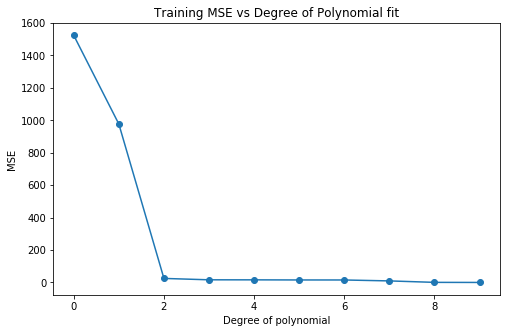

In [102]:
mse_values = []
linReg = LinearRegression()
m = len(X)
model = linReg.fit(X,y)
models = {}
X_app = X.copy()
for i in range(10):
    if i == 0:
        model = linReg.fit(X,y)
        models[i] = (model.coef_,model.intercept_)
        mse_values.append((np.sum((model.intercept_-y)**2))/m)
    elif i==1:
        model = linReg.fit(X,y)
        models[i] = (model.coef_,model.intercept_)
        mse_values.append((np.sum((model.predict(X)-y)**2))/m)
    else:
        X_app = np.append(X_app,X_app[:,0].reshape(-1,1)**i,axis=1)
        model = linReg.fit(X_app,y)
        models[i] = (model.coef_,model.intercept_)
        mse_values.append((np.sum((model.predict(X_app)-y)**2))/m)
    

plt.figure(figsize=(8,5))
plt.plot(range(0,10),mse_values,"-o")
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")
plt.title("Training MSE vs Degree of Polynomial fit")

**Hence, it can be noted from the above plot that the Training MSE has the lowest value of approximately 0 when the degree of the polynomial fit is 9. Hence, this is the best model for training data**

### 7.7. Test error

Load **'dataset2_test.npz'**. The data points in the file are from the same distribution as the ones in 'dataset2.npz'.

7) Plot the mean square error by predicting outputs on the test dataset using the trained models of degrees 0,1,...9 obtained with the training data set **dataset2.npz**. Now, comment on the best model for data based on MSE on both training and test datasets.

(Hint: Plot Training error and Testing error in the same plot.) Use Matplotlib for plotting

Text(0.5, 1.0, 'Training/Test MSE vs Degree of polynomial fit')

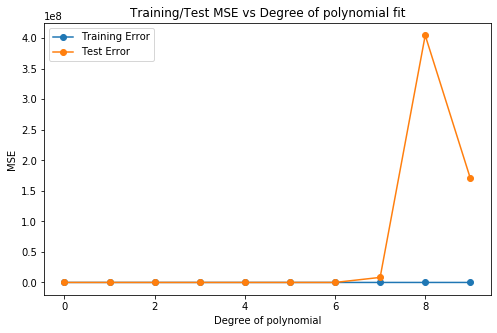

In [103]:
X_test = np.load('.\dataset2_test.npz')["x"].reshape(-1,1)
y_test = np.load('.\dataset2_test.npz')["y"].reshape(-1,1)
X_app_test = X_test.copy()
mse_test = []
for i in range(10):
    if i == 0:
        mse_test.append(np.sum((models[i][1]-y_test)**2)/m)
    elif i==1:
        mse_test.append(np.sum(((np.dot(X_app_test,models[i][0].T)+models[i][1])-y_test)**2)/m)
    else:
        X_app_test = np.append(X_app_test,X_app_test[:,0].reshape(-1,1)**i,axis=1)
        mse_test.append(np.sum(((np.dot(X_app_test,models[i][0].T)+models[i][1])-y_test)**2)/m)

plt.figure(figsize=(8,5))
plt.plot(range(0,10),mse_values,"-o")
plt.plot(range(0,10),mse_test,"-o")
plt.legend(["Training Error", "Test Error"])
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")
plt.title("Training/Test MSE vs Degree of polynomial fit")


In [109]:
#train mses
print(mse_values,"\n\n")
#test mses
print(mse_test)

[1524.067270243191, 977.1734445909718, 24.84633172780817, 16.26492228044507, 16.031363704399592, 15.356207903504545, 15.2222269258502, 9.477956239307613, 0.4898616333469, 2.212079474910619e-14] 


[10157.225542737093, 10161.131707308186, 63.81395835718818, 903.0295303099995, 527.3952682491012, 2221.69573892286, 5287.089605874923, 8247548.743170855, 404643462.93156, 170596808.40913534]


### 7.8. Best Degree of polynomial

8)Hint : Based on Test error.

**The degree of the polynomial fit that gave the best (lowest) test error (63.814) is 2 - Quadratic. Hence, quadratic polynomial function best generalizes the data, even if it did not have the best training error.**

# Section 8 : Multiple Linear Regression on Boston Housing Price Data
Import data from **"dataset3.csv"**. This is one among the sklearn standard datasets which can be used to develop a model for house price prediction "load_boston". Description of the features can be found in the sklearn documentation if you want to explore.

## 8.1. Describe the data
Hint :  Categorical features = ['RAD', 'CHAS', 'ZN'], Non-categorical features = Except categorical all the other features
1. Find Mean, Median for Non-categorical features and Price, Mode only for Categorical feaures
2. Find Quantiles at 25th, 50th, 75th for Non-categorical features and Price
3. Find Maximum and Minimum, Range of the data (max -min) for Non-categorical features and Price
4. Find Distributions (Histogram) for Non-categorical features and Price (Using Seaborn is suggested)

**Note** - Dont use pandas.describe here. You may use inbuilt functions from numpy package. You can store the above descriptive statistics in a dataframe and print that dataframe.

#### 8.1.1

In [72]:
dataset3 = pd.read_csv("dataset3.csv")

#Mean of non-categorical features CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT, Price
print("\033[1mMean of Non-Categorical features:\033[0m")
print("Mean of CRIM  = %f"%(np.sum(dataset3["CRIM"])/len(dataset3)))
print("Mean of ZN = %f"%(np.sum(dataset3["ZN"])/len(dataset3)))
print("Mean of INDUS = %f"%(np.sum(dataset3["INDUS"])/len(dataset3)))
print("Mean of NOX = %f"%(np.sum(dataset3["NOX"])/len(dataset3)))
print("Mean of RM = %f"%(np.sum(dataset3["RM"])/len(dataset3)))
print("Mean of AGE = %f"%(np.sum(dataset3["AGE"])/len(dataset3)))
print("Mean of DIS = %f"%(np.sum(dataset3["DIS"])/len(dataset3)))
print("Mean of TAX = %f"%(np.sum(dataset3["TAX"])/len(dataset3)))
print("Mean of PTRATIO = %f"%(np.sum(dataset3["PTRATIO"])/len(dataset3)))
print("Mean of B = %f"%(np.sum(dataset3["B"])/len(dataset3)))
print("Mean of LSTAT = %f"%(np.sum(dataset3["LSTAT"])/len(dataset3)))
print("Mean of Price = %f"%(np.sum(dataset3["Price"])/len(dataset3)))

#Median of non-categorical features CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT, Price
print("\n\033[1mMedian of Non-Categorical features:\033[0m")
print("Median of CRIM  = %f"%(np.median(dataset3["CRIM"])))
print("Median of ZN = %f"%(np.median(dataset3["ZN"])))
print("Median of INDUS = %f"%(np.median(dataset3["INDUS"])))
print("Median of NOX = %f"%(np.median(dataset3["NOX"])))
print("Median of RM = %f"%(np.median(dataset3["RM"])))
print("Median of AGE = %f"%(np.median(dataset3["AGE"])))
print("Median of DIS = %f"%(np.median(dataset3["DIS"])))
print("Median of TAX = %f"%(np.median(dataset3["TAX"])))
print("Median of PTRATIO = %f"%(np.median(dataset3["PTRATIO"])))
print("Median of B = %f"%(np.median(dataset3["B"])))
print("Median of LSTAT = %f"%(np.median(dataset3["LSTAT"])))
print("Median of Price = %f"%(np.median(dataset3["Price"])))


Mean of Non-Categorical features:
Mean of CRIM  = 3.613524
Mean of ZN = 11.363636
Mean of INDUS = 11.136779
Mean of NOX = 0.554695
Mean of RM = 6.284634
Mean of AGE = 68.574901
Mean of DIS = 3.795043
Mean of TAX = 408.237154
Mean of PTRATIO = 18.455534
Mean of B = 356.674032
Mean of LSTAT = 12.653063
Mean of Price = 22.532806

Median of Non-Categorical features:
Median of CRIM  = 0.256510
Median of ZN = 0.000000
Median of INDUS = 9.690000
Median of NOX = 0.538000
Median of RM = 6.208500
Median of AGE = 77.500000
Median of DIS = 3.207450
Median of TAX = 330.000000
Median of PTRATIO = 19.050000
Median of B = 391.440000
Median of LSTAT = 11.360000
Median of Price = 21.200000


In [73]:
#Function for calculating mode of categorical features:
def mode(arr):
    n = len(arr)
    count = {}
    modes = []
    for ele in arr:
        count[ele] = sum(arr==ele)
    for ind in count:
        if count[ind]==max(count.values()):
            modes.append(ind)
    return modes

for feat in ["CHAS","RAD"]:
    print("Mode of "+feat+ " = " +  str(mode(dataset3[feat].astype(int))))

Mode of CHAS = [0]
Mode of RAD = [24]


#### 8.1.2

In [74]:
print("25% Quantile")
print(dataset3[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","Price"]].quantile(0.25))
print("\n50% Quantile")
print(dataset3[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","Price"]].quantile(0.5))
print("\n75% Quantile")
print(dataset3[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","Price"]].quantile(0.75))

25% Quantile
CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
Price       17.025000
Name: 0.25, dtype: float64

50% Quantile
CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
Price       21.20000
Name: 0.5, dtype: float64

75% Quantile
CRIM         3.677083
ZN          12.500000
INDUS       18.100000
CHAS         0.000000
NOX          0.624000
RM           6.623500
AGE         94.075000
DIS          5.188425
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          396.225000
LSTAT       16.955000
Price       25.000

#### 8.1.3

In [75]:
for feat in ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","Price"]:
    print("Min of "+feat+ " = %f"%min(dataset3[feat]))
    print("Max of "+feat+ " = %f"%max(dataset3[feat]))
    print("Range of "+feat+ " = %f"%(max(dataset3[feat])-min(dataset3[feat])),end="\n\n")

Min of CRIM = 0.006320
Max of CRIM = 88.976200
Range of CRIM = 88.969880

Min of ZN = 0.000000
Max of ZN = 100.000000
Range of ZN = 100.000000

Min of INDUS = 0.460000
Max of INDUS = 27.740000
Range of INDUS = 27.280000

Min of CHAS = 0.000000
Max of CHAS = 1.000000
Range of CHAS = 1.000000

Min of NOX = 0.385000
Max of NOX = 0.871000
Range of NOX = 0.486000

Min of RM = 3.561000
Max of RM = 8.780000
Range of RM = 5.219000

Min of AGE = 2.900000
Max of AGE = 100.000000
Range of AGE = 97.100000

Min of DIS = 1.129600
Max of DIS = 12.126500
Range of DIS = 10.996900

Min of RAD = 1.000000
Max of RAD = 24.000000
Range of RAD = 23.000000

Min of TAX = 187.000000
Max of TAX = 711.000000
Range of TAX = 524.000000

Min of PTRATIO = 12.600000
Max of PTRATIO = 22.000000
Range of PTRATIO = 9.400000

Min of B = 0.320000
Max of B = 396.900000
Range of B = 396.580000

Min of LSTAT = 1.730000
Max of LSTAT = 37.970000
Range of LSTAT = 36.240000

Min of Price = 5.000000
Max of Price = 50.000000
Range o

#### 8.1.4

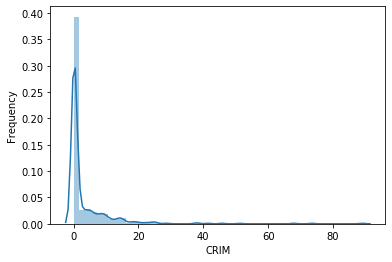

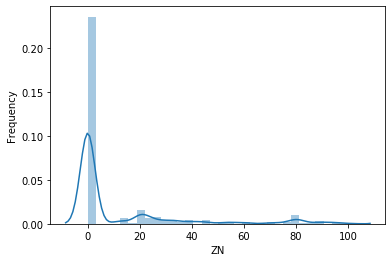

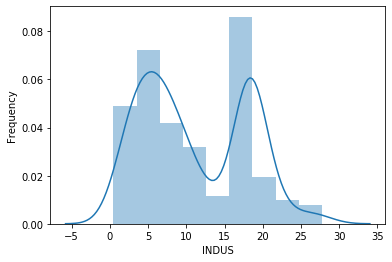

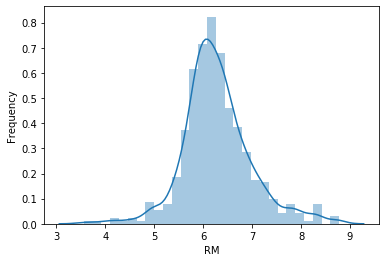

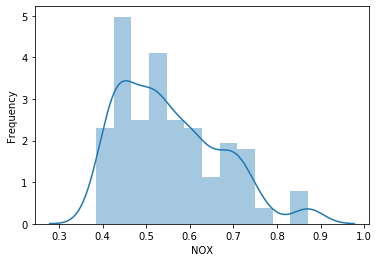

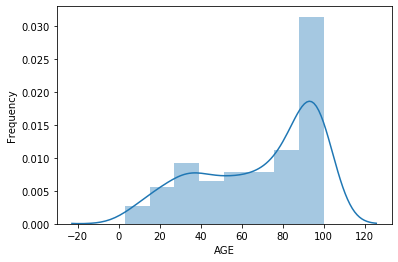

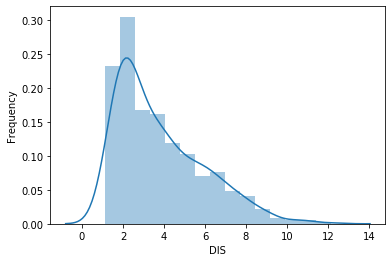

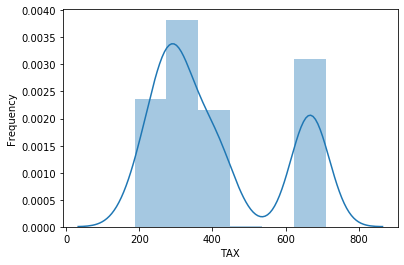

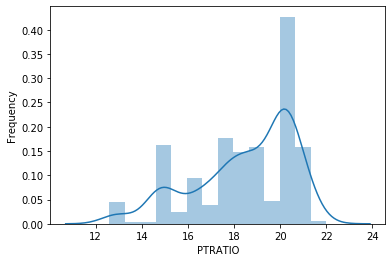

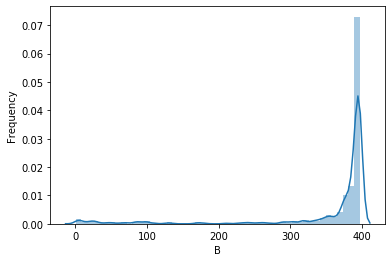

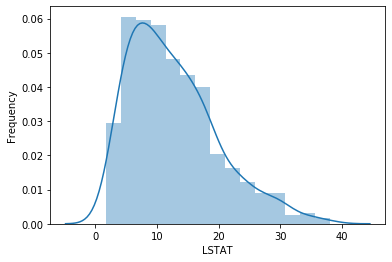

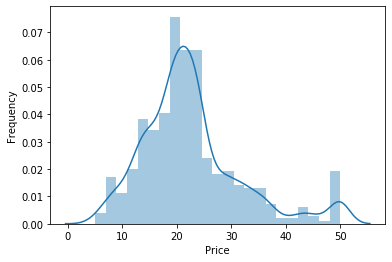

In [93]:
#Histogram plots of Non-categorical features
i=1
for feat in ["CRIM","ZN","INDUS","RM","NOX","AGE","DIS","TAX","PTRATIO","B","LSTAT","Price"]:
    plt.figure(i)
    i+=1
    #plt.hist(dataset3[feat])
    sb.distplot(dataset3[feat])
    plt.xlabel(feat)
    plt.ylabel("Frequency")

## 8.2. Correlation Heatmap for all the features and target
**Hint** : Use Seaborn library to plot, note keep annotate = True

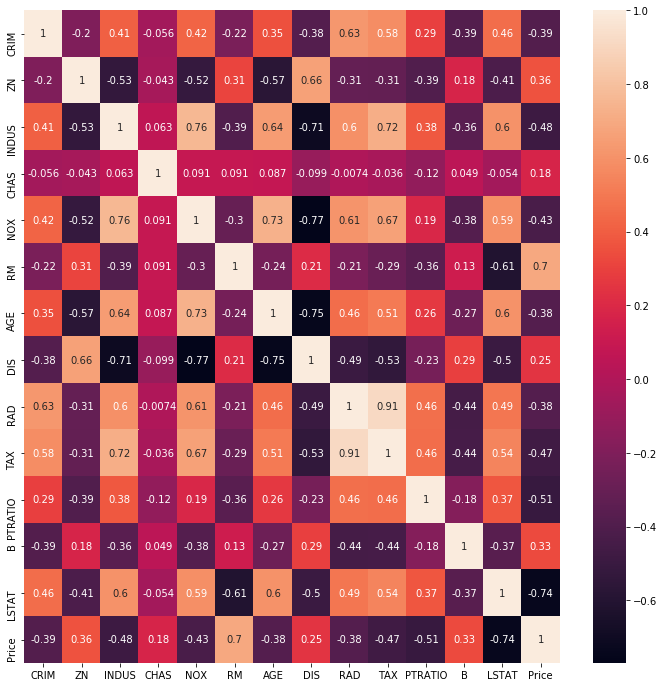

In [6]:
#Correlation heatmap
corr_matrix = dataset3.corr()
from seaborn import heatmap
plt.figure(figsize = (12,12))
heatmap(corr_matrix,annot = True)

## 8.3. Highly Correlated features
Find and print the highly correlated features with respect to "Price". 

In [94]:
print("The correlation scores between each of the features and Price is shown below (In descending order)\n")
print(corr_matrix["Price"].sort_values(ascending = False))

The correlation scores between each of the features and Price is shown below (In descending order)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64


Highly positively correlated features with price are: RM, ZN, B

Highly negatively correlated features with price are: LSTAT, PTRATIO, INDUS, TAX, NOX

## 8.4. Split the Dataset
**Hint** : Use sklearn train_test_split to split the data into train and test data, keep random state = 2020 and test_size = 0.33

In [86]:
#Splitting the dataset into 67% training, 33% test
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(dataset3,test_size = 0.33,random_state = 2020)
train_price = train_data["Price"]
test_price = test_data["Price"]
#Normalisation
train_data = train_data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
test_data = test_data[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
train_data = (train_data-train_data.mean())/train_data.std()
test_data = (test_data-test_data.mean())/test_data.std()

## 8.5. Train the model on only train data using linear_regression
Report Train MSE

In [87]:
#Performing multiple linear regression on dataset3 to determine the relationship between all the features and the price
model = LinearRegression()
model.fit(train_data,train_price)
predictions_train = model.predict(train_data)
mse_train = np.mean((predictions_train-train_price)**2)
print("MSE for Training Data = %f"%mse_train)

MSE for Training Data = 22.166423


## 8.6. Predict Outputs for Test Data
Report test MSE

In [89]:
predictions_test = model.predict(test_data)
mse_test = np.mean((predictions_test-test_price)**2)
print("MSE for test Data = %f"%mse_test)

MSE for test Data = 23.293519


## 8.7. Important Features
Find and print the featuers in order of their importance based on trained regression model.

In [90]:
print("Descending order of regression coeff")
coeffs = pd.DataFrame({"Regression Coefficient:":model.coef_},["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
coeffs.sort_values("Regression Coefficient:",ascending=False)

Descending order of regression coeff


,Regression Coefficient:
RM,3.171699
RAD,2.615346
ZN,1.038072
CHAS,0.874589
B,0.791465
INDUS,0.110032
AGE,-0.282344
CRIM,-0.944188
NOX,-1.787974
TAX,-1.875264


By observing the trained regression coefficients, the most important features are RM, RAD, ZN (high postive coefficients). Features PTRATIO, DIS, LSTAT have high Negative Coefficients

# Q&A Section :
1. Comment on assumptions validity discussed in Section 7 with this dataset? Whether we satisfied assumptions or not.
2. Is there any relation between highly important features(from Section 8.7) and highly correlated features with price?Only give descriptive observation.
3. Why usually test error is higher than training error?
4. Will Analytical solution discussed in the Notebook 1 Section 2 be valid on this dataset? Why or Why not?

#### Q1
The assumptions discussed in Section 7 and their validity and inferences are listed below:
- Linear Relationship between features and target: Upon performing polynomial regression by varying the degree from 0 to 9, it was observed that the quadratic fit (degree 2) had low training error as well as the lowest test error. Hence quadratic fit is the best model. This implies that the assumption of linear relationship was not satisfied in this case.
- Homoscedasticity: Yes, it is valid assumption in the case of quadratic fit as all the data points appeared to be (nearly) equally closer to the functional curve, while it was not in the case of linear fit, where some points were far apart from the line.
- Independence: The samples appeared to be Independent and identically distributed (IID). Hence this assumption is valid 
- Feature Independence: There is only one feature (X) in the data, so there is not another feature for us to compute the correlation.

#### Q2
In almost all cases, the features that had high positive correlation coefficient with price had high positive regression coefficient (eg: RM, ZN), and those which had high negative correlation coefficient with price had high negative regression coefficient (eg: PTRATIO, LSTAT). 

#### Q3
In most cases, the test error is higher than the training error. This is because we train our algorithm on the training data and it tries to model this (training) data by minimising the error (cost function). On the other hand, test data is unseen until we are done estimating all the parameters derived from the training data. The trained model might not always generalise on the unseen test data.

#### Q4
Analytical Solution is highly computationally expensive that involves computing inverse of large matrices, although it might give an accurate solution. So it is generally not preferred. In the case of dataset3, we have around 13 features and 506 samples, and it is recommended to perform gradient descent rather than using the analytical approach. Also, if there are dependent features, $A^TA$ might not be invertible, and this problem does not occur with gradient descent.